In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" x,y=make_classification(n_samples=50,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,flip_y=0,class_sep=3,random_state=20)
x """

' x,y=make_classification(n_samples=50,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,flip_y=0,class_sep=3,random_state=20)\nx '

In [3]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
Y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

In [4]:
print(X.shape)
Y.shape

(2, 20)


(20,)

In [5]:
d,n=X.shape

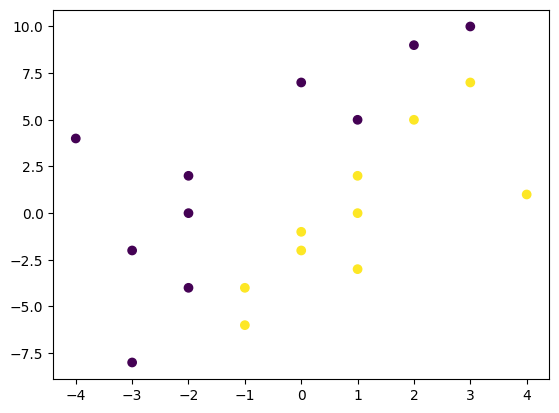

In [6]:
plt.scatter(X[0,:],X[1,:],c=Y)

In [7]:
np.diag(Y).shape

(20, 20)

In [8]:
#perceptron
w=np.zeros(d)
i=0
while not np.all(w@X*Y>0):
    if i==n:
        i=0
    yPred = 1 if w.T@X[:,i]>=0 else -1
    print(f"{yPred} and {Y[i]}")
    if yPred!=Y[i]:
        w+=X[:,i]*Y[i]
    i+=1

1 and 1
1 and 1
1 and 1
1 and 1
1 and 1
1 and 1
1 and 1
1 and 1
1 and 1
1 and 1
1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
1 and -1
1 and -1
1 and -1
1 and -1
1 and -1
1 and 1
1 and 1
1 and 1
1 and 1
1 and 1
1 and 1
-1 and 1
1 and 1
-1 and 1
-1 and 1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
1 and -1
-1 and 1
1 and 1
1 and 1
1 and 1
-1 and 1
-1 and 1
-1 and 1
1 and 1
1 and 1
-1 and 1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
-1 and -1
1 and -1
1 and 1
1 and 1
1 and 1
1 and 1
-1 and 1
-1 and 1


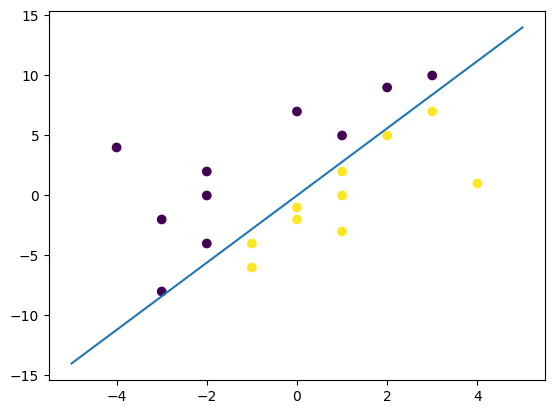

In [9]:
s=np.linspace(-5,5)
t=-w[0]/w[1]*s
plt.scatter(X[0,:],X[1,:],c=Y)
plt.plot(s,t)

In [10]:
p=Y
Y=np.diag(Y)
Q=Y.T@X.T@X@Y
Q

array([[ 10,   1,   1, -18,   6,  17, -13,  -5,   3,  11,  21,  14,  16,
         25,   8,   2,  -3, -10,  27, -21],
       [  1,   1,   4,   3,   0,  -1,   2,   1,   0,  -1,   0,  -1,   4,
         -2,   2,   2,   3,   2,  -3,   3],
       [  1,   4,  17,  19,  -2, -10,  13,   6,  -1,  -8,  -7,  -9,  12,
        -17,   6,   8,  14,  12, -22,  20],
       [-18,   3,  19,  58, -14, -45,  41,  17,  -7, -31, -49, -38, -16,
        -69,  -8,   6,  23,  34, -79,  65],
       [  6,   0,  -2, -14,   4,  12, -10,  -4,   2,   8,  14,  10,   8,
         18,   4,   0,  -4,  -8,  20, -16],
       [ 17,  -1, -10, -45,  12,  37, -32, -13,   6,  25,  42,  31,  20,
         56,  10,  -2, -15, -26,  63, -51],
       [-13,   2,  13,  41, -10, -32,  29,  12,  -5, -22, -35, -27, -12,
        -49,  -6,   4,  16,  24, -56,  46],
       [ -5,   1,   6,  17,  -4, -13,  12,   5,  -2,  -9, -14, -11,  -4,
        -20,  -2,   2,   7,  10, -23,  19],
       [  3,   0,  -1,  -7,   2,   6,  -5,  -2,   1,   4,   7,  

In [11]:
def f(alpha):
    return 0.5*alpha@Q@alpha-alpha.sum()

In [12]:
alpha_init=np.ones(n)
C=np.inf
from scipy import optimize
alpha_star=optimize.minimize(f,
                      alpha_init,
                      bounds=optimize.Bounds(0,C)).x
alpha_star

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.6353075 , 1.7023903 , 1.73069641, 1.70617853,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.657183  , 1.56824036])

In [13]:
X[:,alpha_star>0]
w_star=X@Y@alpha_star
w_star

array([ 2.99999887, -0.99999951])

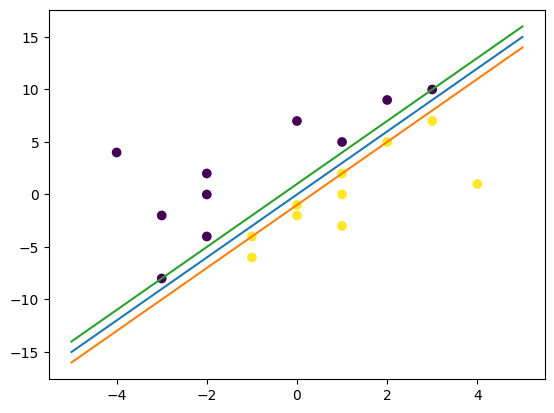

In [14]:
s=np.linspace(-5,5)
t1=-w_star[0]/w_star[1]*s
plt.scatter(X[0,:],X[1,:],c=p)
plt.plot(s,t1)
t2=-w_star[0]/w_star[1]*s+1/w_star[1]
t3=-w_star[0]/w_star[1]*s-1/w_star[1]
plt.plot(s,t2)
plt.plot(s,t3)